### Проект конкуретный анализ рынка общепита 

### Шаг 1 Загрузим данные и подготовим их к анализу

In [140]:
# Импортируем необходимые библиотеки 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from plotly import graph_objects as go
from scipy import stats
from numpy import median

In [141]:
# Для интерактивной визуализации установим бибилатеку plotly 
!pip install plotly

In [142]:
# Импортируем библиотеки для работы с интерактивной визуализации в Jupyter 
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

In [143]:
# Загрузим данные о рынке общепита в Москве
df = pd.read_csv('https://code.s3.yandex.net/datasets/rest_data.csv')
df

,id,object_name,chain,object_type,address,number
0,151635,СМЕТАНА,нет,кафе,"город Москва, улица Егора Абакумова, дом 9",48
1,77874,Родник,нет,кафе,"город Москва, улица Талалихина, дом 2/1, корпус 1",35
2,24309,Кафе «Академия»,нет,кафе,"город Москва, Абельмановская улица, дом 6",95
3,21894,ПИЦЦЕТОРИЯ,да,кафе,"город Москва, Абрамцевская улица, дом 1",40
4,119365,Кафе «Вишневая метель»,нет,кафе,"город Москва, Абрамцевская улица, дом 9, корпус 1",50
...,...,...,...,...,...,...
15361,208537,Шоколадница,да,кафе,"город Москва, 3-й Крутицкий переулок, дом 18",50
15362,209264,Шоколадница,да,кафе,"город Москва, улица Земляной Вал, дом 33",10
15363,209186,Шоколадница,да,кафе,"город Москва, улица Земляной Вал, дом 33",20
15364,221900,Шоколадница,да,кафе,"город Москва, поселение Московский, Киевское ш...",36


In [144]:
# Проверим корректность записи наименований заведений
df.object_name.value_counts()

Столовая                                    267
Кафе                                        236
Шаурма                                      234
KFC                                         155
Шоколадница                                 142
                                           ... 
Кафе «Федя Дичь»                              1
Колледж технологический № 41                  1
Кафе Брассери Брюсель                         1
БУФЕТ -РАЗДАТОЧНАЯ ДЕПО ИМ. Н.Э. БАУМАНА      1
ЗАГОРЬЕ БДО ШК. 877                           1
Name: object_name, Length: 10393, dtype: int64

In [145]:
# Проверим корректность категоризации типов заведений
df.object_type.value_counts()

кафе                                 6099
столовая                             2587
ресторан                             2285
предприятие быстрого обслуживания    1923
бар                                   856
буфет                                 585
кафетерий                             398
закусочная                            360
магазин (отдел кулинарии)             273
Name: object_type, dtype: int64

In [146]:
# Посмотрим на характеристики данных и проверим наличие пропущенных значений
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15366 entries, 0 to 15365
Data columns (total 6 columns):
id             15366 non-null int64
object_name    15366 non-null object
chain          15366 non-null object
object_type    15366 non-null object
address        15366 non-null object
number         15366 non-null int64
dtypes: int64(2), object(4)
memory usage: 720.4+ KB


In [147]:
df.isna().sum()

id             0
object_name    0
chain          0
object_type    0
address        0
number         0
dtype: int64

In [148]:
# Проверим наличие дубликатов в данных 
df.duplicated().sum()

0

    Итак, дубликаты и пропущенные значения в данных отсутствуют, однако записи названий заведений представлены некорректно - кросслитерация. Приведем названия заведений к единому формату и проверим заново наличие дубликатов.  Более того, маркер статуса "сетевое - не сетевое" заведение следует скорректировать и представить в виде булевой переменной. 

In [149]:
# Заменим маркер "сетевое - не сетевое" заведение на булиевую переменную True-False
def to_boolean_values(x):
    if x=='да':
        return True
    elif x=='нет':
        return False
df['chain'] = df['chain'].apply(to_boolean_values)
df.head(2)

,id,object_name,chain,object_type,address,number
0,151635,СМЕТАНА,False,кафе,"город Москва, улица Егора Абакумова, дом 9",48
1,77874,Родник,False,кафе,"город Москва, улица Талалихина, дом 2/1, корпус 1",35


In [150]:
# Приведем названия объектов к нижнему регистру 
df['object_name'] = df['object_name'].str.lower()

In [151]:
# Скорректируем лишние пробелы в наименованиях общественных заведений
symbols = [' -', '- ']

In [152]:
for s in symbols:
    df['object_name'] = df['object_name'].str.replace(s, '-')

In [153]:
print('Дубликатов строк в датасете: {}'.format(df.duplicated().sum()))
print('Дубликатов id объектов: {}\n'.format(len(df)-len(df['id'].value_counts())))
print('Проверим корректность типов объектов:\n{}'.format(df['object_type'].value_counts()))
print('\nТипы объектов не дублируются и указаны корректно.')

Дубликатов строк в датасете: 0
Дубликатов id объектов: 0

Проверим корректность типов объектов:
кафе                                 6099
столовая                             2587
ресторан                             2285
предприятие быстрого обслуживания    1923
бар                                   856
буфет                                 585
кафетерий                             398
закусочная                            360
магазин (отдел кулинарии)             273
Name: object_type, dtype: int64

Типы объектов не дублируются и указаны корректно.


In [154]:
df

,id,object_name,chain,object_type,address,number
0,151635,сметана,False,кафе,"город Москва, улица Егора Абакумова, дом 9",48
1,77874,родник,False,кафе,"город Москва, улица Талалихина, дом 2/1, корпус 1",35
2,24309,кафе «академия»,False,кафе,"город Москва, Абельмановская улица, дом 6",95
3,21894,пиццетория,True,кафе,"город Москва, Абрамцевская улица, дом 1",40
4,119365,кафе «вишневая метель»,False,кафе,"город Москва, Абрамцевская улица, дом 9, корпус 1",50
...,...,...,...,...,...,...
15361,208537,шоколадница,True,кафе,"город Москва, 3-й Крутицкий переулок, дом 18",50
15362,209264,шоколадница,True,кафе,"город Москва, улица Земляной Вал, дом 33",10
15363,209186,шоколадница,True,кафе,"город Москва, улица Земляной Вал, дом 33",20
15364,221900,шоколадница,True,кафе,"город Москва, поселение Московский, Киевское ш...",36


In [155]:
df.object_name.nunique()

9917

In [156]:
df.chain.sum()

2968

Проверим, есть ли в данных заведения без посадочных мест:

In [243]:
len(df[df['chain']==False].query('number == 0'))

1353

In [244]:
len(df[df['chain']==True].query('number == 0'))

268

In [245]:
len(df.query('number == 0')) / len(df)

0.10549264610178316

    Итак, в данных представлено 1353 несетевых заведения и 268 сетевых заведений БЕЗ посадочных мест - это примерно 10.5% от всех заведений. На данном этапе оставим эти данные в том виде, в котором они пресдтавлены, ведь это могут быть заведения типа дарк-китчены или рюмочные.

In [247]:
df[df['chain']==False].groupby('object_name').agg({'object_name':'count', 'number':'median'}).query('object_name > 1')

,object_name,number
object_name,,
13 rules,2,19.5
24 градуса,3,4.0
baskin robbins,2,10.5
bb&burgers,5,40.0
black star burger,2,52.0
...,...,...
эль кафе,2,15.0
эмма,2,90.0
ярославский посад,2,68.0


    Итак, в данных 878 заведений с количеством заведений > 1, однако маркированных в качестве НЕ СЕТЕВЫХ. Мы не можем присваивать статус СЕТИ заведениям одного наименования только по принципу количества объектов (очевидно, есть иные критерии отнесения объектов к СЕТИ). Пока оставим, как есть. 

### Шаг №2. Анализ данных

#### 2.1 Исследуйте соотношение видов объектов общественного питания по количеству. Постройте график

In [472]:
object_types_new = df.groupby('object_type', as_index=False).agg({'object_name':'count'}).sort_values(by='object_name', ascending=False)
object_types_new['percent'] = (object_types_new['object_name']/object_types_new['object_name'].sum()*100).round(1).astype('str') + '%'
fig = px.bar(object_types, y='object_name', x='object_type', text='percent', color='object_type', width=900, height=550)
fig.update_xaxes(tickangle=30)
fig.update_layout(
    title='Соотношение видов объектов общественного питания по количеству',
    xaxis_title="Тип объекта",
    yaxis_title="Количество")
fig.update_traces(textposition='outside')

#for trace, percent in zip(fig.data,object_types_new['percent']) :
    #trace.name = trace.name.split('=')[1] + ' (' + percent+ ')'
#fig.show()

    Как мы видим из диаграммы, наибольшее количество типов объектов составляют: кафе примерно 40%, столовые 17%, рестораны 15%, фастфуды 12,5% и бары 6%.

#### 2.2 Исследуйте соотношение сетевых и несетевых заведений по количеству. Постройте график.

In [159]:
fig = go.Figure(data=go.Pie(labels=df['chain'].value_counts().reset_index()['index'], values=df['chain'].value_counts()))
fig.update_layout(
    title={
        'text':'Соотношение сетевых и несетевых заведений по количеству',
        'y':0.9,
        'x':0.48})
for trace in fig.data:
    trace['labels']=['Несетевые', 'Сетевые']
fig.show()

    Из круговой диаграммы мы можем сделать вывод, что в данных в 4 раза больше не сетевых заведений, нежели сетевых 

#### 2.3 Определим для какого вида объекта общественного питания характерно сетевое распространение

In [160]:
object_types

,object_type,object_name,percent
3,кафе,6099,39.7%
8,столовая,2587,16.8%
7,ресторан,2285,14.9%
6,предприятие быстрого обслуживания,1923,12.5%
0,бар,856,5.6%
1,буфет,585,3.8%
4,кафетерий,398,2.6%
2,закусочная,360,2.3%
5,магазин (отдел кулинарии),273,1.8%


In [199]:
only_chain_object_types = df[df['chain']==True].groupby('object_type', as_index=False).agg({'object_name':'count'}).sort_values(by='object_name', ascending=False)
only_chain_object_types

only_chain_object_types = only_chain_object_types.merge(object_types[['object_type', 'object_name']], 
                                              left_on='object_type', right_on='object_type')
only_chain_object_types.columns=['object_type', 'chain_objects', 'all_objects']
only_chain_object_types['percent'] = (only_chain_object_types['chain_objects'] / only_chain_object_types['chain_objects'].sum()*100).round(1).astype('str')+'%'
only_chain_object_types['percent_without_%'] = (only_chain_object_types['chain_objects'] / only_chain_object_types['chain_objects'].sum()*100).round(1)
only_chain_object_types['percent_of_type'] = (only_chain_object_types['chain_objects'] / only_chain_object_types['all_objects']*100).round(2)
only_chain_object_types['percent_of_type_text'] = only_chain_object_types['percent_of_type'].astype('str')+'%'
only_chain_object_types

,object_type,chain_objects,all_objects,percent,percent_without_%,percent_of_type,percent_of_type_text
0,кафе,1396,6099,47.0%,47.0,22.89,22.89%
1,предприятие быстрого обслуживания,791,1923,26.7%,26.7,41.13,41.13%
2,ресторан,544,2285,18.3%,18.3,23.81,23.81%
3,магазин (отдел кулинарии),78,273,2.6%,2.6,28.57,28.57%
4,закусочная,56,360,1.9%,1.9,15.56,15.56%
5,кафетерий,52,398,1.8%,1.8,13.07,13.07%
6,бар,37,856,1.2%,1.2,4.32,4.32%
7,буфет,11,585,0.4%,0.4,1.88,1.88%
8,столовая,3,2587,0.1%,0.1,0.12,0.12%


    Мы получили сводную таблицу с долей сетевых заведений каждого типа относительно всех заведений и долей сетевый заведенений в каждом конкретном типе заведений относительно всех заведений конкретной категории. Сначала выведем график отношения в % сетевых заведений ко всем сетевым, а затем - график отношения сетевых к несетевым заведениям для каждого конктерного типа.

In [474]:
# Проверим, среди каких объектов общественного питания наиболее представлены сетевые заведения
fig = px.bar(only_chain_object_types, x='object_type', y='chain_objects', 
             width = 900, height = 550, color='object_type', text='percent')
fig.update_xaxes(tickangle=30)
fig.update_layout(
    title='Соотношение видов СЕТЕВЫХ объектов общественного питания по количеству',
    xaxis_title="Тип объекта",
    yaxis_title="Количество")
fig.update_traces(textposition='outside')

    Как мы видим из диаграммы, наибольшее количество типов СЕТЕВЫХ объектов составляют: кафе 47%, фастфуды 27%, рестораны 18.3%, доля же остальных типов объектов очень не велика

In [200]:
# Проверим, для каких типов общественных заведений наиболее характерны сетевые 
fig = px.bar(only_chain_object_types.sort_values(by='percent_of_type', ascending = False), 
             x='object_type', y='percent_of_type', width = 900, height = 550, color='object_type', 
             text='percent_of_type_text')
fig.update_xaxes(tickangle=30)
fig.update_layout(
    title='Доля СЕТЕВЫХ объектов от всех объектов общественного питания (по типам)',
    xaxis_title="Тип объекта",
    yaxis_title="% заведений")
fig.update_traces(textposition='outside')
#for trace, percent in zip(fig.data, only_chain_object_types.sort_values(by='percent_of_type', ascending = False)['chain_objects'].astype('str')):
    #trace.name = trace.name.split('=')[1] + ' (' + percent+ ' объектов)'
#fig.show()

In [483]:
trace_0 = go.Bar(
    x=object_types_new.object_type,
    y=object_types_new.object_name)
    #color = 'rgb(205, 12, 24)')

trace_1 = go.Bar(
    x=only_chain_object_types.object_type,
    y=only_chain_object_types.chain_objects)
   # color = 'rgb(22, 96, 167)')


fig = tools.make_subplots(rows=2, cols=1)
fig.append_trace(trace_0, 1, 1)
fig.append_trace(trace_1, 2, 1)

layout = go.Layout(
    title='Фильмы на Кинопоиске'
)

fig = go.Figure(data = fig, layout = layout)
iplot(fig)

NameError: name 'tools' is not defined

    Как мы видим из графика, сетевое распространение характерно для предприятий быстрого обслуживания (41% заведений данного типа). В меньше мере оно характерно для магазинов (29% заведений), ресторанов (24% заведений) и кафе (23% заведений). В наименьшей степени - для баров, буфетов, столовых. Таким образом, в пропорциональном срезе картина изменилась.

#### Что характерно для сетевых заведений: много заведений с небольшим числом посадочных мест в каждом или мало заведений с большим количеством посадочных мест?

    Для того, чтобы оценить распределения заведений общественного питания по количеству объектов и количеству посадочных мест, выведем совместный skatterplot для кол-ва заведений и кол-ва посадочных мест.

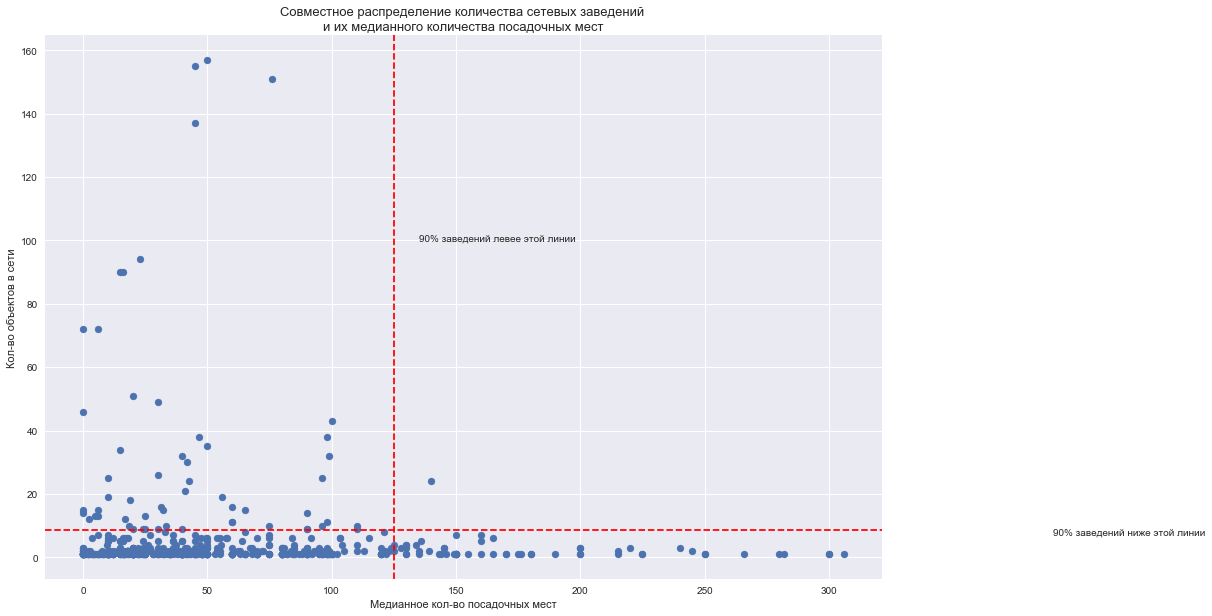

В 90% сетей не больше 125 посадочных мест и 8 заведений в среднем


In [213]:
chain_objects = df[df['chain']==True].groupby('object_name').agg({'object_name':'count', 'number':'median'})
chain_objects.columns = ['objects', 'median_number']

with plt.style.context('seaborn'):
    plt.figure(figsize=(15,10))
    plt.scatter(chain_objects['median_number'], chain_objects['objects'])
    plt.xlabel('Медианное кол-во посадочных мест')
    plt.ylabel('Кол-во объектов в сети')
    plt.title('Совместное распределение количества сетевых заведений \nи их медианного количества посадочных мест', fontsize=13)
    plt.axhline(np.percentile(chain_objects['objects'], 90), linestyle='--', color='red')
    plt.axvline(np.percentile(chain_objects['median_number'], 90), linestyle='--', color='red')
    plt.text(390,7, '90% заведений ниже этой линии')
    plt.text(135,100, '90% заведений левее этой линии')
    plt.show()
print('В 90% сетей не больше {} посадочных мест и {} заведений в среднем'.format(int(np.percentile(chain_objects['median_number'], 90)) , int(np.percentile(chain_objects['objects'], 90))))



   Лишь у одного сетевого заведения одновременно больше 8 объектов с количеством мест в каждом (в среднем) более 125 - это кафе "Му-Му".

In [222]:
chain_objects.loc[(chain_objects['objects'] > 8) & (chain_objects['median_number'] > 125)]

,objects,median_number
object_name,,
му-му,24,140.0


In [227]:
chain_objects['objects'].describe()

count    576.000000
mean       5.152778
std       15.566774
min        1.000000
25%        1.000000
50%        1.000000
75%        3.000000
max      157.000000
Name: objects, dtype: float64

In [228]:
chain_objects['median_number'].describe()

count    576.000000
mean      58.090278
std       53.721938
min        0.000000
25%       20.000000
50%       43.250000
75%       83.625000
max      306.000000
Name: median_number, dtype: float64

Итак, для большинства сетевых объектов общественного питания в Москве характерно малое количество заведений с большим количеством пасадочных мест. Для 90% сетей не больше 130 посадочных мест и 8 заведений в среднем (медиана). Данные выводы довольно логичны: сокращая количество заведений бизнес экономит на фиксированных издержках, увеличивая маржинальность. При этом, в данных встречаются заведения с рекордно высоким количеством заведений 157 и медианным количеством посадочных мест в 306.

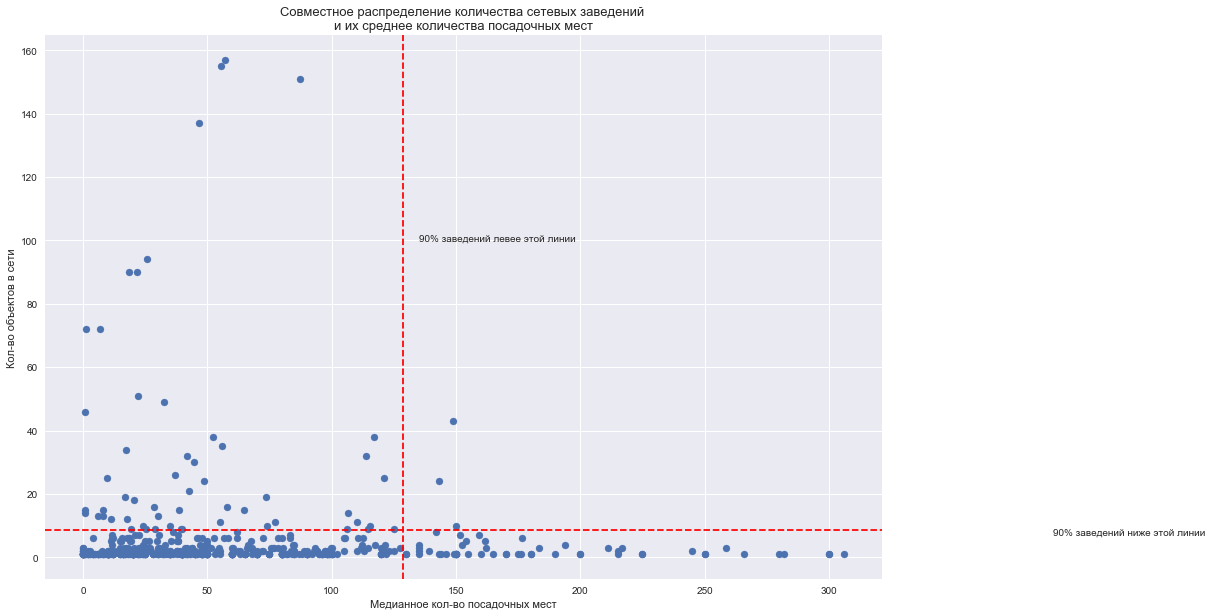

Картина сильно не изменилась: В 90% сетей не больше 128 посадочных мест и 8 заведений в среднем


In [259]:
# Сравним со средними показателями vs медианными посадочных мест, принимая во внимание наличие экстремально высоких значений 
# по количеству мест в данных 
chain_objects_mean = df[df['chain']==True].groupby('object_name').agg({'object_name':'count', 'number':'mean'})
chain_objects_mean.columns = ['objects', 'mean_number']

with plt.style.context('seaborn'):
    plt.figure(figsize=(15,10))
    plt.scatter(chain_objects_mean['mean_number'], chain_objects_mean['objects'])
    plt.xlabel('Медианное кол-во посадочных мест')
    plt.ylabel('Кол-во объектов в сети')
    plt.title('Совместное распределение количества сетевых заведений \nи их среднее количества посадочных мест', fontsize=13)
    plt.axhline(np.percentile(chain_objects_mean['objects'], 90), linestyle='--', color='red')
    plt.axvline(np.percentile(chain_objects_mean['mean_number'], 90), linestyle='--', color='red')
    plt.text(390,7, '90% заведений ниже этой линии')
    plt.text(135,100, '90% заведений левее этой линии')
    plt.show()
print('Картина сильно не изменилась: В 90% сетей не больше {} посадочных мест и {} заведений в среднем'.format(int(np.percentile(chain_objects_mean['mean_number'], 90)) , int(np.percentile(chain_objects_mean['objects'], 90))))


    Проведем t-тест (Стьюдента) для того, чтобы проверить, отличается ли среднее количество посадочных мест в СЕТЕВЫХ и НЕ СЕТЕВЫХ общественных заведениях.

In [248]:
alpha=0.05

results = stats.ttest_ind(chain_objects['median_number'], df[df['chain']==False]['number'])

print('\nПроверим нулевую гипотезу о том, что кол-во посадочных мест в сетевых и несетевых заведениях ОДИНАКОВО')
print('Применим тест Стъюдента, несмотря на то, что наши распределения скорее всего не нормальны.'
     '\nБлагодаря большому количеству значений, нам позволительно использовать здесь тест Стъюдента,'
     '\nтак как распределение всех выборочных средних стремится к нормальному распределению.')
print('Возьмем критический уровень значимости, равный', alpha)
print('P-value: {}'.format(results.pvalue))
if results.pvalue < alpha:
    print('Нулевая гипотеза отвергнута. \nРазница между кол-вом посадочных мест в сетевых и несетевых объектах СТАТИСТИЧЕСКИ ЗНАЧИМА')
else:
    print('Нулевая гипотеза НЕ отвергнута. \nРазница между кол-вом посадочных мест в сетевых и несетевых объектах ОТСУТСТВУЕТ')


Проверим нулевую гипотезу о том, что кол-во посадочных мест в сетевых и несетевых заведениях ОДИНАКОВО
Применим тест Стъюдента, несмотря на то, что наши распределения скорее всего не нормальны.
Благодаря большому количеству значений, нам позволительно использовать здесь тест Стъюдента,
так как распределение всех выборочных средних стремится к нормальному распределению.
Возьмем критический уровень значимости, равный 0.05
P-value: 0.3560299773657597
Нулевая гипотеза НЕ отвергнута. 
Разница между кол-вом посадочных мест в сетевых и несетевых объектах ОТСУТСТВУЕТ


#### Для каждого вида объекта общественного питания опишем среднее количество посадочных мест. Какой вид предоставляет в среднем самое большое количество посадочных мест? Постройте графики.

Так как разброс количества посадочных мест довольно большой в СЕТЕВЫХ и НЕСЕТЕВЫХ ресторанах, в качестве меры центральной тенденции применим медиану.

In [269]:
df.groupby(['object_name']).agg({'number': 'median'}).describe()

,number
count,9917.000000
mean,65.691136
std,78.401889
min,0.000000
25%,20.000000
50%,41.000000
75%,85.000000
max,1700.000000


In [264]:
number_of_seats_by_object = df.pivot_table(index='object_type', values='number', aggfunc='median').sort_values(by='number', ascending=False).reset_index()
number_of_seats_by_object
number_of_seats_by_object.columns=['Тип объекта', 'Кол-во посадочных мест']
print('Топ-5 типов объектов по количеству посадочных мест:\n\n', number_of_seats_by_object.head(5))

fig = px.bar(number_of_seats_by_object, x='Тип объекта', y='Кол-во посадочных мест', 
            text = 'Кол-во посадочных мест', color='Тип объекта', width = 900, height = 550)
#for trace in fig.data:
    #trace.name = trace.name.split('=')[1] 
fig.update_layout(title={'text':'Среднее кол-во посадочных мест по видам объектов',
                        'x':0.125})
fig.show() 

Топ-5 типов объектов по количеству посадочных мест:

   Тип объекта  Кол-во посадочных мест
0    столовая                     103
1    ресторан                      80
2         бар                      35
3       буфет                      32
4        кафе                      30


In [272]:
sns.set(rc={'figure.figsize':(10, 8)})

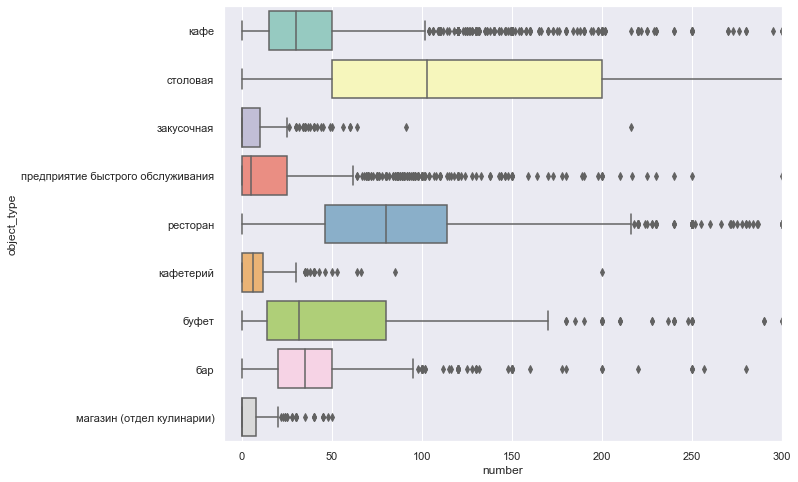

In [273]:
ax = sns.boxplot(x='number', y='object_type', data=df, palette="Set3")
ax.set_xlim(-10,300)
plt.show()

    Как мы видим из графика, именно у типов объекта СТОЛОВАЯ наибольшее количество посадочных мест - в медиане 103!

In [278]:
df.groupby('object_type')['number'].describe().round().sort_values(by='50%').reset_index()

,object_type,count,mean,std,min,25%,50%,75%,max
0,закусочная,360.0,8.0,17.0,0.0,0.0,0.0,10.0,216.0
1,магазин (отдел кулинарии),273.0,6.0,10.0,0.0,0.0,0.0,8.0,50.0
2,предприятие быстрого обслуживания,1923.0,21.0,38.0,0.0,0.0,5.0,25.0,580.0
3,кафетерий,398.0,9.0,15.0,0.0,0.0,6.0,12.0,200.0
4,кафе,6099.0,40.0,38.0,0.0,15.0,30.0,50.0,533.0
5,буфет,585.0,51.0,56.0,0.0,14.0,32.0,80.0,320.0
6,бар,856.0,43.0,67.0,0.0,20.0,35.0,50.0,1700.0
7,ресторан,2285.0,97.0,95.0,0.0,46.0,80.0,114.0,1500.0
8,столовая,2587.0,130.0,95.0,0.0,50.0,103.0,200.0,1400.0


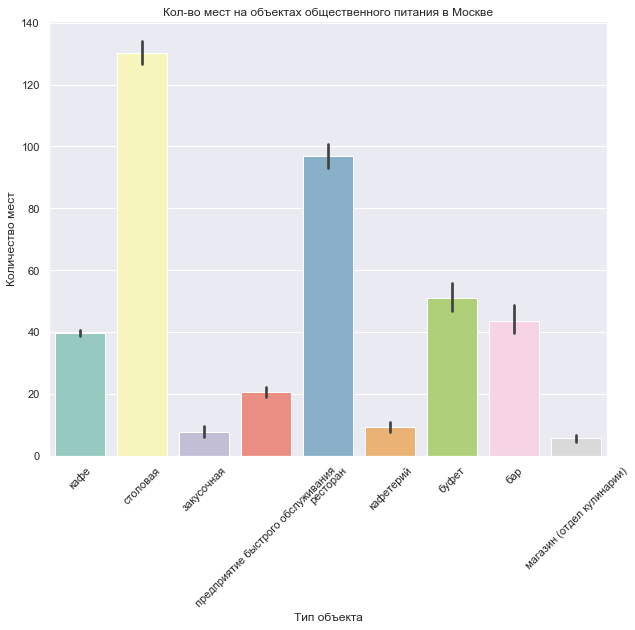

In [280]:
ax = sns.barplot(x='object_type', y='number', data=df, palette="Set3")
ax.set_xlabel('Тип объекта')
ax.set_ylabel('Количество мест')
ax.set_title('Кол-во мест на объектах общественного питания в Москве')
plt.xticks(rotation=45)
plt.show()

#### Выделим в отдельный столбец информацию об улице из столбца address

In [282]:
streets = df['address'].to_list()
# Алтернативный способ сплитования № 1:
#df['street'] = df['address'].apply(lambda x: x.split(', ')[1]).copy()

# Альернативный способ сплитования № 2:
#def func(address):
    #words = ['улица', 'бульвар', 'проспект', 'переулок', 'шоссе', 
#'проезд', 'набережная', 'площадь', 'аллея', 'линия', 'квартал', 'мост', 'тупик', 'просека', 'вал']
    #for row in df_tested['address']:
        #for i in row.split(','):
            #for el in i.split(' '):
                #if el in words:
                    #return i
#df_tested['street'] = df_tested['address'].apply(func)

['город Москва, улица Егора Абакумова, дом 9',
 'город Москва, улица Талалихина, дом 2/1, корпус 1',
 'город Москва, Абельмановская улица, дом 6',
 'город Москва, Абрамцевская улица, дом 1',
 'город Москва, Абрамцевская улица, дом 9, корпус 1',
 'город Москва, Абрамцевская улица, дом 15, корпус 1',
 'город Москва, переулок Сивцев Вражек, дом 6/2',
 'город Москва, Авиамоторная улица, дом 8, строение 1',
 'город Москва, Авиамоторная улица, дом 8, строение 1',
 'город Москва, Авиамоторная улица, дом 8, строение 1',
 'город Москва, Авиамоторная улица, дом 47',
 'город Москва, Авиамоторная улица, дом 49/1',
 'город Москва, Авиамоторная улица, дом 51',
 'город Москва, улица Авиаторов, дом 14',
 'город Москва, улица Авиаторов, дом 16',
 'город Москва, улица Авиаторов, дом 18',
 'город Москва, Азовская улица, дом 3',
 'город Москва, Азовская улица, дом 4',
 'город Москва, Большая Академическая улица, дом 65',
 'город Москва, Филипповский переулок, дом 15/5',
 'город Москва, Алтайская улица, до

    Классическим способом сплитования вывести названия улиц не получится: в данных названия улиц расположены в разных местах, в то время как таким способом в списках окажутся крупные образования, вроде городов/поселений с элементами адресов. Поэтому, напишем функцию для применения с помощью apply. Внутри нее мы заведем вот такой набор ключевых слов, которые определяют именно улицу, а не какое-то более крупное формирование вроде города.

In [315]:
# Заведем список с регулярными выражениями
street_types = ['улица', 'бульвар', 'проспект', 'переулок', 'шоссе', 
'проезд', 'набережная', 'площадь', 'аллея', 'линия', 'квартал', 'мост', 'тупик', 'просека', 'вал']
# Строку с адресом сплитуем по ,. Затем циклом перебираем слова из списка выше, если это слово есть в элементе сплитования 
# строки адреса, то возвращаем ее, как “улицу”
def street_finder(address):
    for address_part in address.split(', '):
        for street_type in street_types:
            if address_part.lower().find(street_type)!= -1:
                return address_part

df['streets'] = df['address'].apply(street_finder)
data_with_streets = df[~(df['streets'].isnull())]
len(df) - len(data_with_streets)

381

    После выделения конкретных улиц из адресов объектов общественного питания, в данных осталось 382 адреса, в которых улицы не указаны ЯВНО. Как правило, это поселки и другие загородные адреса. В целях дальнейшего определения районов Москвы по адресам мы не станем использовать эти адреса, то есть, сохраним в датафреме только адреса с ЯВНЫМИ названиями улиц. Посмотрим на него.

In [317]:
data_with_streets.head(5)

,id,object_name,chain,object_type,address,number,streets
0,151635,сметана,False,кафе,"город Москва, улица Егора Абакумова, дом 9",48,улица Егора Абакумова
1,77874,родник,False,кафе,"город Москва, улица Талалихина, дом 2/1, корпус 1",35,улица Талалихина
2,24309,кафе «академия»,False,кафе,"город Москва, Абельмановская улица, дом 6",95,Абельмановская улица
3,21894,пиццетория,True,кафе,"город Москва, Абрамцевская улица, дом 1",40,Абрамцевская улица
4,119365,кафе «вишневая метель»,False,кафе,"город Москва, Абрамцевская улица, дом 9, корпус 1",50,Абрамцевская улица


#### Построим график топ-10 улиц по количеству объектов общественного питания.

In [323]:
top_streets = data_with_streets.groupby('streets', as_index=False).agg({'object_name':'count'})
top_streets.columns = ['streets', 'objects']
top_streets = top_streets.sort_values(by='objects', ascending = False)
top10_streets = top_streets.head(10)
print('Топ-10 улиц с наибольшим количеством заведений:\n', top10_streets)

Топ-10 улиц с наибольшим количеством заведений:
                      streets  objects
1427           проспект Мира      204
1014       Профсоюзная улица      183
686   Ленинградский проспект      173
997   Пресненская набережная      167
399         Варшавское шоссе      165
689       Ленинский проспект      148
1423    проспект Вернадского      132
676     Кутузовский проспект      114
599          Каширское шоссе      112
606     Кировоградская улица      110


In [327]:
fig = px.bar(top10_streets, x='streets', y='objects', 
             color='streets', width = 900, height = 550, text='objects')
fig.update_xaxes(tickangle=45)
fig.update_layout(
    title='Топ-10 улиц с наибольшим количеством заведений',
    xaxis_title="Улица",
    yaxis_title="Количество заведений")


    Воспользуемся Гуглом:

    Проспект Мира: Мещанский, Марьина Роща, Алексеевский, Останкинский, Свиблово, Ростокино
    Профсоюзная улица: Академический, Коньково, Обручевский, Тёплый Стан, Черёмушки, Ясенево
    Ленинградский проспект: Беговой, Аэропорт, Сокол, Хорошёвский
    Пресненская набережная: Пресненский
    Варшавское шоссе: Донской, Нагатино-Садовники, Нагорный
    Ленинский проспект: Гагаринский и Донской
    Проспект Вернадского: Проспект Вернадского
    Кутузовский проспект: Дорогомилово, Фили-Давыдково
    Каширское шоссе: Нагатино-Садовники и Нагорный
    Ходынский бульвар: Хорошёвский

#### Найдите число улиц с одним объектом общественного питания. Воспользуйтесь внешней информацией и ответьте на вопрос — в каких районах Москвы находятся эти улицы?

    Проверим, какое количество улиц содержит лишь 1 объект заведений общественного питания. Убедимся, что таких объектов много. Для того, что определить, к какому району Москвы относятся эти улицы, мы предлагаем обратиться к внешнему источнику данных - сервису Яндекс.Геокодер. Работа с API Яндекс.Геокодера позволяет перевести географические координаты в адрес и наоборот. 

In [329]:
streets_with_one_object = top_streets[top_streets['objects']==1]
print('Всего улиц с 1 объектом общественного питания: {}, что составляет {:.1%} от всего кол-ва улиц с объектами общественного питания'\
      .format(len(streets_with_one_object), (len(streets_with_one_object)/len(top_streets))))

Всего улиц с 1 объектом общественного питания: 552, что составляет 29.0% от всего кол-ва улиц с объектами общественного питания


    Обратимся к списку к датафрему с релевантным названием улиц и достанем только характеристики тех объектов, которые лишь однажды встречаются на конкретной улице 

In [358]:
# Проверим, сколько таких улиц: 552 (Кстати: ровно столько же улиц у нас получилось бы и на сырых данных со всеми! адресами)
temp = data_with_streets.groupby('streets').count()
len(temp.query('id == 1'))

552

In [360]:
# Отфильтруем эти данные по кол-ву объектов
temp = temp.query('id == 1')
temp = temp.reset_index()

In [361]:
# Сохраним список наименований улиц с одним объектом
one_object_address = list(temp['streets'])

In [364]:
# Проведем срез данных по соответствию списку улиц с одним объектом для того, чтобы получить полные адреса заведений, 
# которые на них расположены
one_object_address_final = data_with_streets[data_with_streets['streets'].isin(one_object_address)]
one_object_address_final

,id,object_name,chain,object_type,address,number,streets
19,153644,американская лаборатория десертов,False,кафе,"город Москва, Филипповский переулок, дом 15/5",20,Филипповский переулок
61,21214,столовая,False,столовая,"город Москва, Бабаевская улица, дом 3",90,Бабаевская улица
69,22139,хуанхэ,False,ресторан,"город Москва, 1-й Балтийский переулок, дом 3/25",60,1-й Балтийский переулок
81,25833,азербайджан,False,ресторан,"город Москва, улица Демьяна Бедного, дом 4",180,улица Демьяна Бедного
131,150881,вгик,False,столовая,"город Москва, Будайская улица, дом 3",45,Будайская улица
...,...,...,...,...,...,...,...
14440,211368,пацио пицца,False,кафе,"город Москва, улица Линии Октябрьской Железной...",20,улица Линии Октябрьской Железной Дороги
14704,214324,кадаши ( закрытый),False,ресторан,"город Москва, 2-й Кадашёвский переулок, дом 16...",15,2-й Кадашёвский переулок
14798,223171,кондитерская «пряник.рогалик»,False,кафе,"город Москва, город Троицк, Пионерская улица, ...",20,Пионерская улица
14974,213930,горячий хлеб,False,предприятие быстрого обслуживания,"город Москва, поселение Десеновское, улица Дми...",0,улица Дмитрия Рябинкина


In [365]:
# Сохраним список адресов этих объектов в отдельную переменную
one_object_address_list = one_object_address_final['address'].tolist()

        1. Сперва вам надо сделать запрос с “поиском по адресу“. Геокодер по каждому из адресов будет возвращать определенный набор данных. Среди этих данных можно найти координаты этого адреса. Адрес надо передавать с номером дома, чтобы для длинных улиц, которые идут через половину Москвы, находит точный район соответствующий конкретному заведению.
        2. Достав координаты надо сделать еще один запрос в API, который теперь произведет поиск по координатам и уже в этом ответе API можно найти район.
        3. У API есть ограничение на кол-во бесплатных запросов в сутки, поэтому, прежде чем apply’ит код сразу ко всему датафрейму, я отлажу его на паре строк, убедиться, что все работает и после этого уже запущу выгрузку для всего датасета

In [366]:
# Создадим тестовый список на трех адресах нашей выборки. На данном датафрейма была осуществлена проверка исправности
# GET запроса (API) и Jason ответа сервиса 
test_drive = one_object_address_final.iloc[0:3]
address_list_test = test_drive['address'].tolist()
address_list_test

['город Москва, Филипповский переулок, дом 15/5',
 'город Москва, Бабаевская улица, дом 3',
 'город Москва, 1-й Балтийский переулок, дом 3/25']

In [389]:
# Создадим список адресов для тех улиц, на которых расположено по одному заведению 
all_address_list = one_object_address_final['address'].tolist()

In [392]:
# Создаем датафрейм со списком всех адресов, который послужит основой 
all_coordinat_address_df = pd.DataFrame(all_address_list)
all_coordinat_address_df.columns = ['address']
 
#записываем ключ
key = 'c62c2cb0-c5f3-4720-a294-afa6292830e0'
 
#зададим параметры запроса, чтобы получать в ответ на запрос json - файл
params = { # словарь с параметрами запроса
        "format" : "json", # определяем формат ответа на запрос
    }
 
#зададим функцию, которая на вход будет получать адрес и возвращать район
def mapmaker(address):
 
    #создадим url для запроса координат
    url = 'https://geocode-maps.yandex.ru/1.x/?apikey=' + key + '&geocode=' + address
 
    #сделаем запрос к геокодеру
    response = requests.get(url, params = params)
 
    #получим координаты точки
    coord = json.loads(response.text)['response']['GeoObjectCollection']['featureMember'][0]['GeoObject']['Point']['pos']
 
    #создадим url для запроса по координатам
    url_coord = 'https://geocode-maps.yandex.ru/1.x/?apikey=' + key + '&geocode=' + coord
 
    #делаем запрос по координатам
    response_coord = requests.get(url_coord, params = params)
 
    #получаем район из результатов запроса
    try:
        district = json.loads(response_coord.text)['response']['GeoObjectCollection']['featureMember'][2]['GeoObject']['metaDataProperty']['GeocoderMetaData']['AddressDetails']['Country']['AdministrativeArea']['Locality']['DependentLocality']['DependentLocality']['DependentLocalityName']
    except:
        district = 'Не определен'
 
    return(district)
 
all_coordinat_address_df['district'] = all_coordinat_address_df['address'].apply(mapmaker)
display(all_coordinat_address_df)

,address,district
0,"город Москва, Филипповский переулок, дом 15/5",район Арбат
1,"город Москва, Бабаевская улица, дом 3",район Сокольники
2,"город Москва, 1-й Балтийский переулок, дом 3/25",район Аэропорт
3,"город Москва, улица Демьяна Бедного, дом 4",район Хорошёво-Мнёвники
4,"город Москва, Будайская улица, дом 3",район Ростокино
...,...,...
547,"город Москва, улица Линии Октябрьской Железной...",Тимирязевский район
548,"город Москва, 2-й Кадашёвский переулок, дом 16...",район Якиманка
549,"город Москва, город Троицк, Пионерская улица, ...",Не определен
550,"город Москва, поселение Десеновское, улица Дми...",Не определен


In [394]:
len(all_coordinat_address_df.query('district == "Не определен"'))

51

    Итак, в результате парсинга для 51 адреса конечный район не был присвоен. Для большинства таких адресов можно сказать, что они расположены в пригороде или МО, за некоторым исключением. Принимая во внимание тот факт, что запрос был отправлен по полным адресам (с наименованием города и номера дома - чтобы исключить ошибку присвоение конкретной улице - одного района - в то время как улица пересекает несколько таковых, т.е. тянется через всю Москву - проблема в непосредственной идентификации не точного адреса. 

    Альтернативные примеры парсинга районов через get запросы и транскрибирования ответов XML:
    
    1. Запрос координат (формируем HTTP-запрос, скармливая полные адреса объектов):
    
    import requests
    from bs4 import BeautifulSoup
 
 
    API_KEY = 'c62c2cb0-c5f3-4720-a294-afa6292830e0'
    address_list = address_list_test

    coord_list = []
    for address in address_list:
        url = "https://geocode-maps.yandex.ru/1.x/?apikey={}&geocode=Москва,{}".format(API_KEY, address)
        response = requests.get(url)
        x = response.text
        print(x)
        soup=BeautifulSoup(x, 'lxml')
        coord = soup.find_all('pos')
        coord_list.append(coord)
        print(coord)
        
    2.  Запрос районов (формируем HTTP-запрос, скармливая координаты объектов объектов):
    
    API_KEY = 'c62c2cb0-c5f3-4720-a294-afa6292830e0'
    coordinat_list = coord_list
    #district_list = []
    for coord in coordinat_list:
        url = "https://geocode-maps.yandex.ru/1.x/?apikey={}&geocode=Москва,{}".format(API_KEY, coord)
        response = requests.get(url)
        x = response.text
        print(x)
        soup=BeautifulSoup(x, 'lxml')
        district = soup.find_all('DependentLocalityName')
        district_list.append(district)
    

    Для того, чтобы оптимизировать проверку кода, сохраним словарь "адрес-район" в отдельный датафрейм на локалку. Далее загрузим csv фалй в Google Sheets, после чего предоставим доступ по токену проверяющим, чтобы можно было выгрузить файл по API Google Sheets в Jupyter. Также это оптимизирует ресурсы сервера в случае обращению к проекту.

In [408]:
# Сохраним файл в формате csv в отдельный датафрейм на локальный диск
all_coordinat_address_df.to_csv('new_slovarik_street_district_final.csv')

In [412]:
# Импортируем необходимые библиотеки для работы с Google Sheets API 
from io import BytesIO
import requests

# Создадим токен, укажем путь к файлу и считаем словарик из Google Sheets
spreadsheet_id = '1FA2bxy1_8KwHobJoyV4x7LFKIDf1HB1cYjmH5Egbs0I'
file_name = 'https://docs.google.com/spreadsheets/d/{}/export?format=csv'.format(spreadsheet_id).format(spreadsheet_id)
r = requests.get(file_name)
all_coordinat_address_df = pd.read_csv(BytesIO(r.content))
all_coordinat_address_df

,Unnamed: 0,address,district
0,0,"город Москва, Филипповский переулок, дом 15/5",район Арбат
1,1,"город Москва, Бабаевская улица, дом 3",район Сокольники
2,2,"город Москва, 1-й Балтийский переулок, дом 3/25",район Аэропорт
3,3,"город Москва, улица Демьяна Бедного, дом 4",район Хорошёво-Мнёвники
4,4,"город Москва, Будайская улица, дом 3",район Ростокино
...,...,...,...
547,547,"город Москва, улица Линии Октябрьской Железной...",Тимирязевский район
548,548,"город Москва, 2-й Кадашёвский переулок, дом 16...",район Якиманка
549,549,"город Москва, город Троицк, Пионерская улица, ...",Не определен
550,550,"город Москва, поселение Десеновское, улица Дми...",Не определен


In [414]:
all_coordinat_address_df = all_coordinat_address_df.drop(columns='Unnamed: 0')
all_coordinat_address_df

,address,district
0,"город Москва, Филипповский переулок, дом 15/5",район Арбат
1,"город Москва, Бабаевская улица, дом 3",район Сокольники
2,"город Москва, 1-й Балтийский переулок, дом 3/25",район Аэропорт
3,"город Москва, улица Демьяна Бедного, дом 4",район Хорошёво-Мнёвники
4,"город Москва, Будайская улица, дом 3",район Ростокино
...,...,...
547,"город Москва, улица Линии Октябрьской Железной...",Тимирязевский район
548,"город Москва, 2-й Кадашёвский переулок, дом 16...",район Якиманка
549,"город Москва, город Троицк, Пионерская улица, ...",Не определен
550,"город Москва, поселение Десеновское, улица Дми...",Не определен


In [ ]:
import pandas as pd
import gspread
from df2gspread import df2gspread as d2g
from oauth2client.service_account import ServiceAccountCredentials


scope = ['https://spreadsheets.google.com/feeds',
         'https://www.googleapis.com/auth/drive']


my_mail = 'mksmandrikcommunty@gmail.com'
path_to_credentials = 'crdentials.json'


# Authorization
credentials = ServiceAccountCredentials.from_json_keyfile_name(path_to_credentials, scope)
gs = gspread.authorize(credentials)

In [418]:
final_objects_discriptions = one_object_address_final.merge(all_coordinat_address_df, on='address', how='inner')
final_objects_discriptions.head(5)

,id,object_name,chain,object_type,address,number,streets,district
0,153644,американская лаборатория десертов,False,кафе,"город Москва, Филипповский переулок, дом 15/5",20,Филипповский переулок,район Арбат
1,21214,столовая,False,столовая,"город Москва, Бабаевская улица, дом 3",90,Бабаевская улица,район Сокольники
2,22139,хуанхэ,False,ресторан,"город Москва, 1-й Балтийский переулок, дом 3/25",60,1-й Балтийский переулок,район Аэропорт
3,25833,азербайджан,False,ресторан,"город Москва, улица Демьяна Бедного, дом 4",180,улица Демьяна Бедного,район Хорошёво-Мнёвники
4,150881,вгик,False,столовая,"город Москва, Будайская улица, дом 3",45,Будайская улица,район Ростокино


In [423]:
final_objects_discriptions.query('district != "Не определен"').groupby('district').count().sort_values('id').reset_index().tail(10)

,district,id,object_name,chain,object_type,address,number,streets
88,Мещанский район,12,12,12,12,12,12,12
89,район Замоскворечье,12,12,12,12,12,12,12
90,район Лефортово,12,12,12,12,12,12,12
91,район Соколиная Гора,12,12,12,12,12,12,12
92,район Марьина Роща,17,17,17,17,17,17,17
93,Басманный район,17,17,17,17,17,17,17
94,Тверской район,19,19,19,19,19,19,19
95,Пресненский район,20,20,20,20,20,20,20
96,Таганский район,26,26,26,26,26,26,26
97,район Хамовники,26,26,26,26,26,26,26


In [426]:
print('Районы, в которых находятся улицы с 1 объектом общественного питания:')
for district in final_objects_discriptions['district'].sort_values().unique():
    print('-', district)

Районы, в которых находятся улицы с 1 объектом общественного питания:
- Алексеевский район
- Алтуфьевский район
- Бабушкинский район
- Басманный район
- Бескудниковский район
- Бутырский район
- Войковский район
- Гагаринский район
- Головинский район
- Даниловский район
- Дмитровский район
- Донской район
- Красносельский район
- Лосиноостровский район
- Мещанский район
- Можайский район
- Молжаниновский район
- Нагорный район
- Не определен
- Нижегородский район
- Обручевский район
- Останкинский район
- Пресненский район
- Рязанский район
- Савёловский район
- Таганский район
- Тверской район
- Тимирязевский район
- Хорошёвский район
- Южнопортовый район
- Ярославский район
- район Арбат
- район Аэропорт
- район Беговой
- район Бирюлёво Восточное
- район Богородское
- район Внуково
- район Восточное Измайлово
- район Выхино-Жулебино
- район Гольяново
- район Дорогомилово
- район Замоскворечье
- район Западное Дегунино
- район Зюзино
- район Ивановское
- район Измайлово
- район Капот

#### Посмотрим на распределение количества посадочных мест для улиц с большим количеством объектов общественного питания. Подумаем, какие закономерности можно выявить.

In [428]:
df

,id,object_name,chain,object_type,address,number,streets
0,151635,сметана,False,кафе,"город Москва, улица Егора Абакумова, дом 9",48,улица Егора Абакумова
1,77874,родник,False,кафе,"город Москва, улица Талалихина, дом 2/1, корпус 1",35,улица Талалихина
2,24309,кафе «академия»,False,кафе,"город Москва, Абельмановская улица, дом 6",95,Абельмановская улица
3,21894,пиццетория,True,кафе,"город Москва, Абрамцевская улица, дом 1",40,Абрамцевская улица
4,119365,кафе «вишневая метель»,False,кафе,"город Москва, Абрамцевская улица, дом 9, корпус 1",50,Абрамцевская улица
...,...,...,...,...,...,...,...
15361,208537,шоколадница,True,кафе,"город Москва, 3-й Крутицкий переулок, дом 18",50,3-й Крутицкий переулок
15362,209264,шоколадница,True,кафе,"город Москва, улица Земляной Вал, дом 33",10,улица Земляной Вал
15363,209186,шоколадница,True,кафе,"город Москва, улица Земляной Вал, дом 33",20,улица Земляной Вал
15364,221900,шоколадница,True,кафе,"город Москва, поселение Московский, Киевское ш...",36,Киевское шоссе


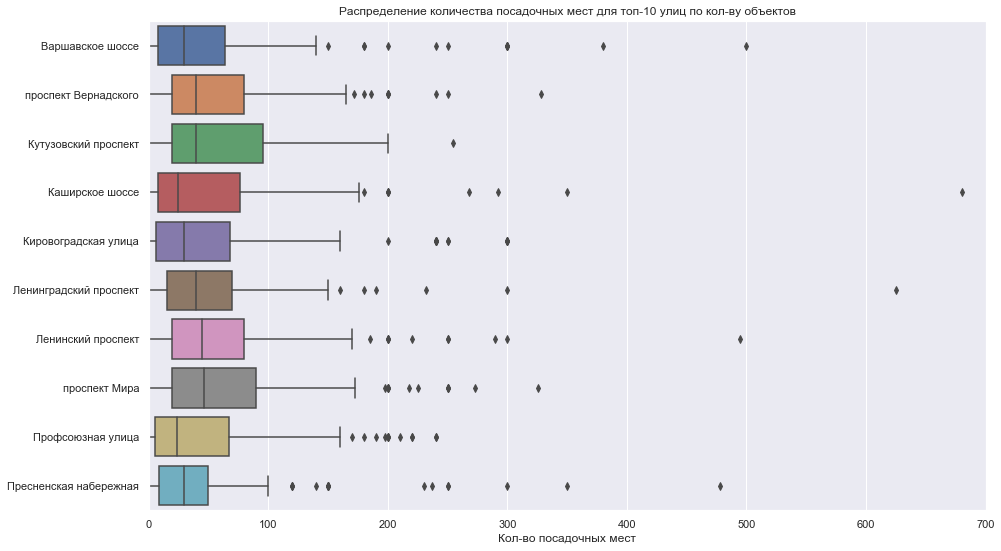

Среднее кол-во посадочных мест в заведениях на топ-10 улицах по количеству объектов: 38.5
Среднее кол-во посадочных мест в заведениях НЕ на топ-10 улицах по количеству объектов: 40.0

Проверим, значима ли статистически разница между кол-вами посадочных мест
в заведениях на топ-10 улицах и остальных.
Используем тест Стъюдента.
Нулевой гипотезой будет гипотеза о равенстве количества посадочных мест на топ-10 улицах по
количеству объектов и на остальных улицах.
P-value: 0.3868435747276817
Не отвергаем нулевую гипотезу. Разницы между количествами посадочных мест НЕТ.


In [434]:
top10_streets_list = top10_streets['streets'].to_list()
top10_streets_data = df.query('streets in @top10_streets_list')


top10_streets_data['number'].median()
df['number'].median()
plt.figure(figsize=(15,9))
plt.xlim(0,700)
sns.boxplot(data=top10_streets_data, x='number', y='streets')
plt.title('Распределение количества посадочных мест для топ-10 улиц по кол-ву объектов')
plt.ylabel('')
plt.xlabel('Кол-во посадочных мест')
plt.show()

print('Среднее кол-во посадочных мест в заведениях на топ-10 улицах по количеству объектов: {}'.format(top10_streets_data['number'].median()))
print('Среднее кол-во посадочных мест в заведениях НЕ на топ-10 улицах по количеству объектов: {}'\
.format(df.query('streets not in @top10_streets_list')['number'].median()))

print('\nПроверим, значима ли статистически разница между кол-вами посадочных мест'
'\nв заведениях на топ-10 улицах и остальных.')
print('Используем тест Стъюдента.')
print('Нулевой гипотезой будет гипотеза о равенстве количества посадочных мест на топ-10 улицах по'
'\nколичеству объектов и на остальных улицах.')
alpha=0.05

results = stats.ttest_ind(df.query('streets not in @top10_streets_list')['number'],
                            top10_streets_data['number'])
print('P-value: {}'.format(results.pvalue))
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу, разница между количествами посадочных мест статистически ЗНАЧИМА.')
else:
    print('Не отвергаем нулевую гипотезу. Разницы между количествами посадочных мест НЕТ.')

In [456]:
from plotly.offline import iplot

px.box(top10_streets_data, x='streets', y='number', color='streets', width = 900, height = 550)

#top10_streets_data[['streets', 'number']].iplot(
        #y = top10_streets_data.numbers,
        #kind='box',
        #yTitle='number',
        #title='Fans Distribution by Publication')

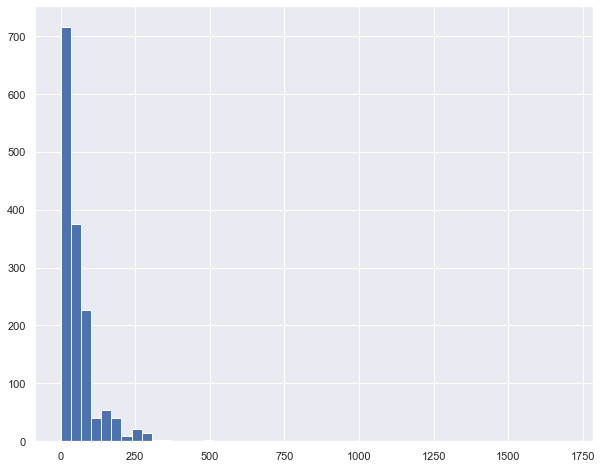

In [492]:
top10_streets_data['number'].hist(bins=50);


### Общие выводы

In [368]:
coord_list

[[<pos>37.598573 55.75058</pos>],
 [<pos>37.689069 55.790595</pos>],
 [<pos>37.518785 55.810471</pos>]]

In [377]:
test_coords = coord_list[:]
test_coords

[[<pos>37.598573 55.75058</pos>],
 [<pos>37.689069 55.790595</pos>],
 [<pos>37.518785 55.810471</pos>]]

In [372]:
district_list

[[<pos>37.189822 55.301608</pos>],
 [<pos>37.295014 55.608562</pos>],
 [<pos>37.295014 55.608562</pos>]]

In [ ]:
https://geocode-maps.yandex.ru/1.x/?apikey=ваш API-ключ&geocode=Москва,+Тверская+улица,+дом+7

In [26]:
streets_only = []
for street in streets:  
    start = street.find('город москва')
    end = street.find('дом')
    streets_only.append(street[start+12:end-1])

In [34]:
street_only_two = df['address'].str.split(',').str[1]
street_only_two

0          улица Егора Абакумова
1               улица Талалихина
2           Абельмановская улица
3             Абрамцевская улица
4             Абрамцевская улица
                  ...           
15361     3-й Крутицкий переулок
15362         улица Земляной Вал
15363         улица Земляной Вал
15364       поселение Московский
15365          Ходынский бульвар
Name: address, Length: 15366, dtype: object